## Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
sns.set_theme(style = 'darkgrid')

## Import datasets
Data obteined in https://www.kaggle.com/c/titanic/data

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## Outlier detection

In [ ]:
## thanks to https://www.kaggle.com/yassineghouzam/titanic-top-4-with-ensemble-modeling

def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR                #### increased to 1.7
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# detect outliers from Age, SibSp , Parch and Fare
Outliers_to_drop = detect_outliers(train,2,["Age","SibSp","Parch","Fare"])
train.loc[Outliers_to_drop] # Show the outliers rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [ ]:
train = train.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

## Merge train and test datasets

In [ ]:
dataset = pd.concat(objs=[train.iloc[:, 1:], test.iloc[:, 1:]], axis=0).reset_index(drop=True)

## Exploratory analysis

In [ ]:
dataset.isnull().sum()

Survived     418
Pclass         0
Name           0
Sex            0
Age          256
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1007
Embarked       2
dtype: int64

In [ ]:
dataset.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299 entries, 0 to 1298
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  881 non-null    float64
 1   Pclass    1299 non-null   int64  
 2   Name      1299 non-null   object 
 3   Sex       1299 non-null   object 
 4   Age       1043 non-null   float64
 5   SibSp     1299 non-null   int64  
 6   Parch     1299 non-null   int64  
 7   Ticket    1299 non-null   object 
 8   Fare      1298 non-null   float64
 9   Cabin     292 non-null    object 
 10  Embarked  1297 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 111.8+ KB


In [ ]:
dataset.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,881.000000,1299.000000,1043.000000,1299.000000,1299.000000,1298.000000
mean,0.385925,2.294072,29.903806,0.452656,0.372594,32.569058
std,0.487090,0.837150,14.427548,0.879416,0.857157,50.694652
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,30.646850
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


### Histograns for each numerical attribute

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f96e5f910f0>,
      dtype=object)

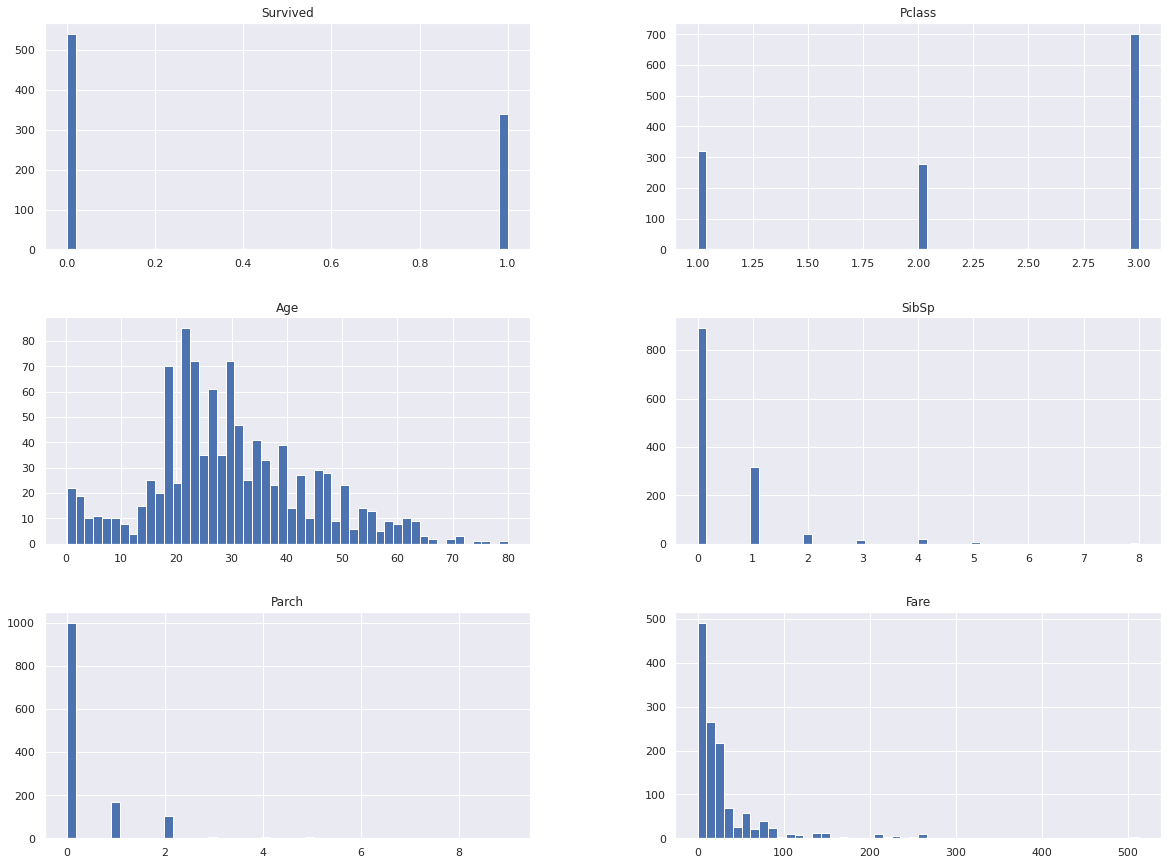

In [ ]:
dataset.hist(bins = 50, figsize = (20, 15))

### Detecting Correlations

In [ ]:
corrMatrix = dataset.corr()
corrMatrix['Survived'].sort_values(ascending = False)

Survived    1.000000
Fare        0.264613
Parch       0.092819
SibSp       0.003330
Age        -0.076867
Pclass     -0.334097
Name: Survived, dtype: float64

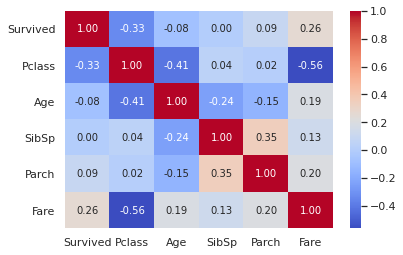

In [ ]:
sns.heatmap(dataset[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr(), annot=True, fmt='.2f', cmap='coolwarm')

Hight relation between Survived, Pclass and Fare.

### Chance of survival by sex

In [ ]:
dataset[["Sex","Survived"]].groupby('Sex').mean()

,Survived
Sex,
female,0.747573
male,0.190559


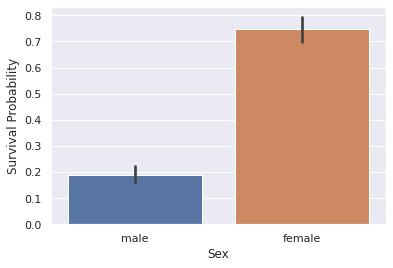

In [ ]:
g = sns.barplot(x="Sex",y="Survived",data=dataset)
g = g.set_ylabel("Survival Probability")

### Chance of survival by class

In [ ]:
dataset[['Pclass', 'Survived']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629108
2,0.472826
3,0.245868


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


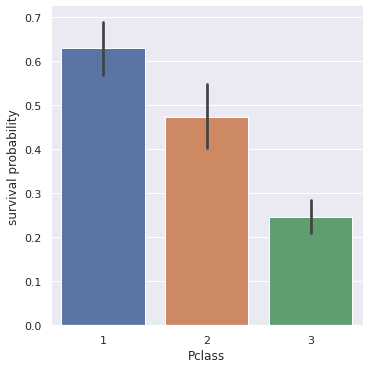

In [ ]:
g = sns.factorplot(x="Pclass",y="Survived",data=dataset,kind="bar")
g = g.set_ylabels("survival probability")

## Data pre-processing

### Treatment of missing data of column Embarked

In [ ]:
# Value nan in in column Embarked of training set. Value 'S' more frequent
Counter(train.iloc[:, 11])

Counter({'C': 168, 'Q': 77, 'S': 634, nan: 2})

In [ ]:
train.iloc[:, 11] = train.iloc[:, 11].fillna('S')

In [ ]:
X_train = train.iloc[:, [2, 4, 5, 6, 7, 9, 11]].values
X_test = test.iloc[:, [1, 3, 4, 5, 6, 8, 10]].values
y_train = train.iloc[:, 1].values

testId = test["PassengerId"]

### Treatment of missing data of Age and Fare

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='median')

imputer.fit(X_train[:, [2, 5]])
X_train[:, [2,5]] = imputer.transform(X_train[:, [2,5]])

imputer.fit(X_test[:, [2, 5]])
X_test[:, [2,5]] = imputer.transform(X_test[:, [2,5]])

### Conversion of column Sex

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

le = LabelEncoder()
X_train[:, 1] = le.fit_transform(X_train[:, 1])
X_test[:, 1] = le.fit_transform(X_test[:, 1])

### Conversion of column Embarked

In [ ]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-1])], remainder='passthrough')
X_train = np.array(ct.fit_transform(X_train))

ct2 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-1])], remainder='passthrough')
X_test = np.array(ct2.fit_transform(X_test))

## Scaling of dependent variables

In [ ]:
ss = StandardScaler()
X_train[:, -4:] = ss.fit_transform(X_train[:, -4:])
X_test[:, -4:] = ss.transform(X_test[:, -4:])

## Training (Support Vector Machine)

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(classifier, X_train, y_train, cv=5)

## Performance indicator 

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[481,  60],
       [ 97, 243]])

In [ ]:
accuracy_score(y_train, y_train_pred)

0.8217934165720772

## Performing prediction

**Input values:**

1. Ticket class (Pclass): 2
1. Sex: man
1. Age: 20
1. Number of siblings / spouses aboard the Titanic (Sibsp): 1
1. Number of parents / children aboard the Titanic (Parch): 0
1. Fare: 20
1. Port of Embarkation (Embarked): Southampton (S)

**Prediction:** Not survived

In [ ]:
a = [0, 0, 1]
b = [2, 1]
c = [20, 1, 0, 20]
aux = ss.transform([c])
pred = np.concatenate([a, b, aux[0]])
print(classifier.predict([pred]))

[0]


## Prediction of test data

In [ ]:
testSurvived = pd.Series(classifier.predict(X_test), name="Survived")
results = pd.concat([testId,testSurvived], axis=1)
results.to_csv("predictionSVM.csv", index=False)